In [50]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score,adjusted_rand_score,adjusted_mutual_info_score
import plotly.express as px
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings('ignore',category= FutureWarning)
warnings.filterwarnings('ignore',message="When grouping with a lenght-1 list-like")

In [17]:
customer_data =pd.read_csv('Mall_Customers.csv')

In [18]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
customer_data.shape

(200, 5)

In [20]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [21]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

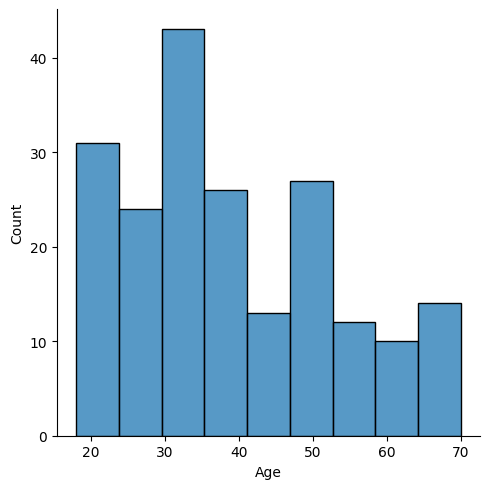

In [45]:
sns.displot(customer_data['Age'])

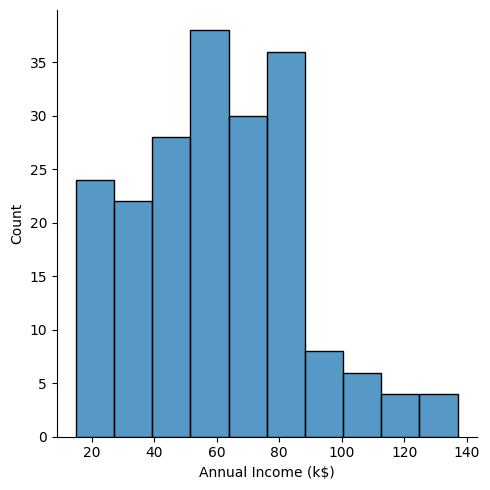

In [46]:
sns.displot(customer_data['Annual Income (k$)'])

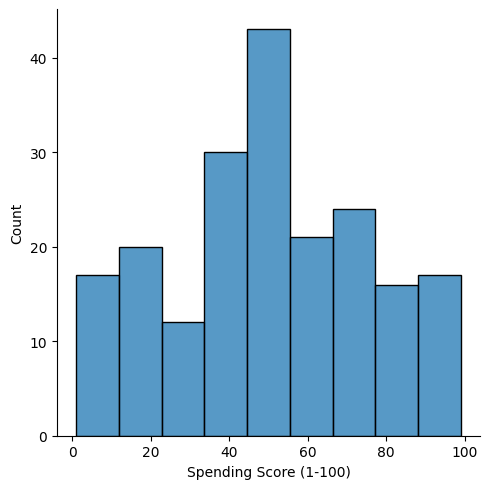

In [47]:
sns.displot(customer_data['Spending Score (1-100)'])

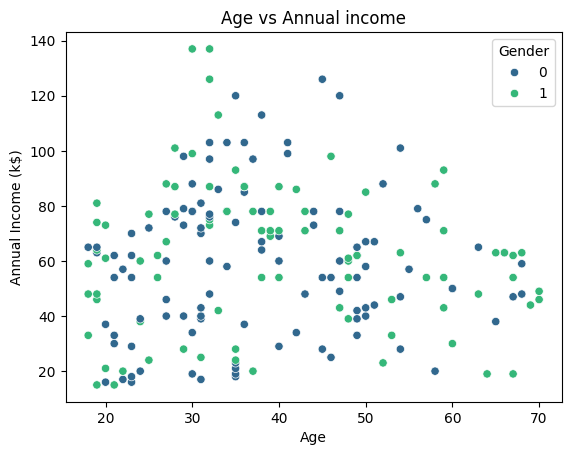

In [87]:

sns.scatterplot( x='Age',y='Annual Income (k$)',hue='Gender',data= customer_data,palette='viridis')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual income')
plt.show()


Text(0, 0.5, 'Annual Income (k$)')

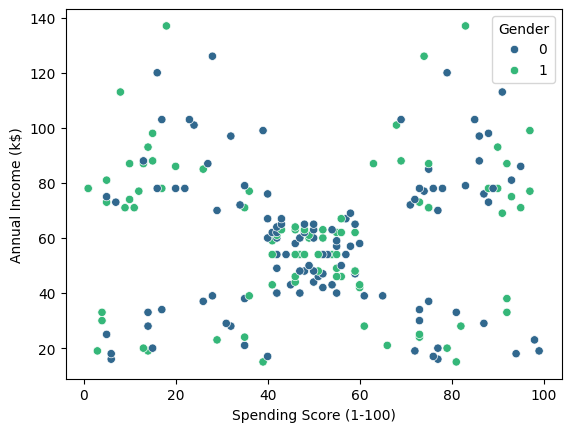

In [84]:
sns.scatterplot(x='Spending Score (1-100)',y ='Annual Income (k$)',hue='Gender',data=customer_data,palette='viridis')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')

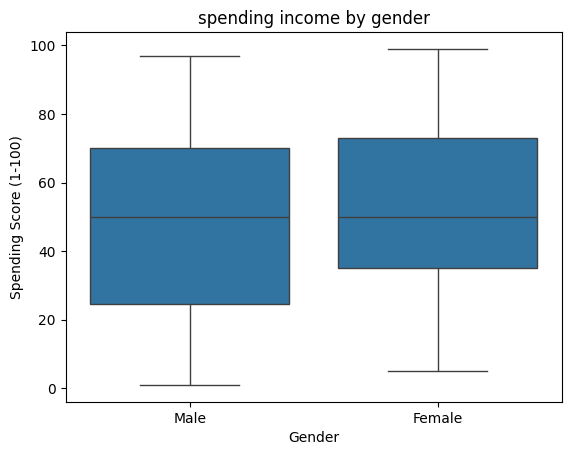

In [67]:
sns.boxplot(customer_data,x='Gender',y='Spending Score (1-100)')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('spending income by gender')
plt.show()

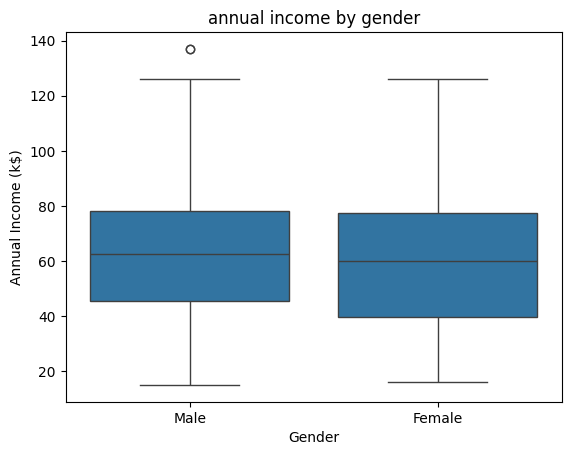

In [68]:
sns.boxplot(customer_data,x='Gender',y='Annual Income (k$)')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.title('annual income by gender')
plt.show()

In [73]:
Label_Encoder=LabelEncoder()
customer_data['Gender']=Label_Encoder.fit_transform(customer_data['Gender'])
customer_data['Gender']

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

In [74]:
x= customer_data[['Annual Income (k$)','Spending Score (1-100)']]

In [75]:
scalar=StandardScaler()
scalar_x = scalar.fit_transform(x)
scalar_x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [78]:
wccs = []
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(scalar_x)
    wccs.append(kmeans.inertia_)
print(wccs)

[400.0, 273.66888662642015, 157.70400815035947, 109.22822707921345, 65.5684081557168, 60.13287487193422, 49.668244837367986, 37.319122878338824, 32.49508119910091, 30.05932269404221]


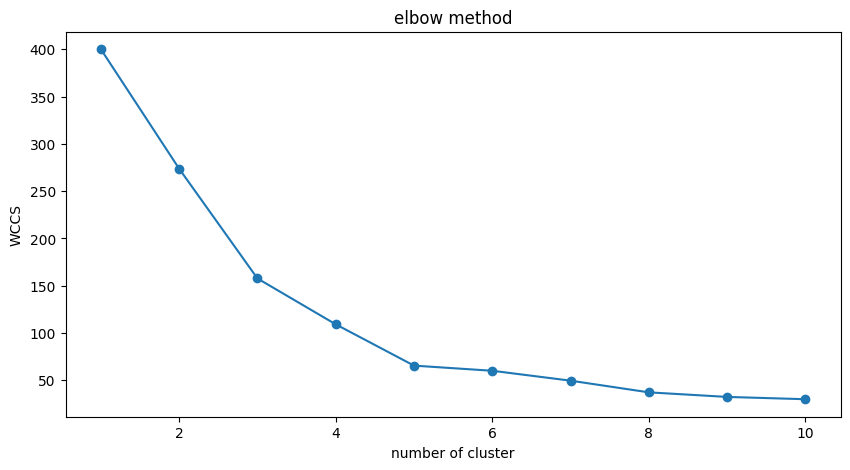

In [79]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wccs,marker='o')
plt.title('elbow method')
plt.xlabel('number of cluster')
plt.ylabel('WCCS')
plt.show()

In [80]:
kmeans =KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans =kmeans.fit_predict(scalar_x)
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [81]:
customer_data['Cluster'] =y_kmeans
customer_data['Cluster']

0      4
1      2
2      4
3      2
4      4
      ..
195    1
196    3
197    1
198    3
199    1
Name: Cluster, Length: 200, dtype: int32

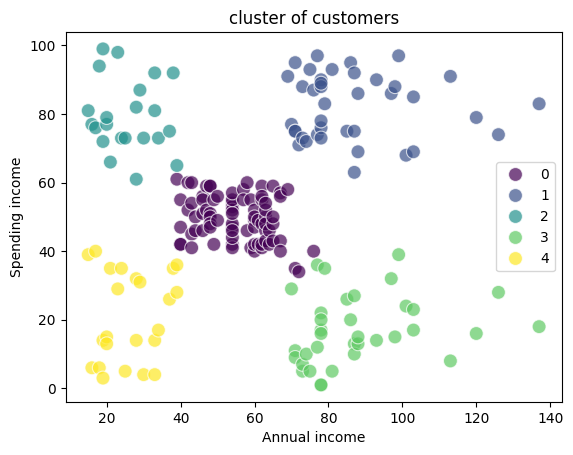

In [88]:
plt.Figure(figsize=(10,7))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster',data=customer_data,palette='viridis',s=100,alpha=0.7)
plt.title('cluster of customers')
plt.xlabel('Annual income')
plt.ylabel('Spending income')
plt.legend()
plt.show()

In [89]:
inertia=kmeans.inertia_
print(f'interia of wccs:{inertia}')

interia of wccs:65.5684081557168


silhouette score:
     to measure the similarity of object is to its own cluster compared to other clusters, it range from -1 to 1 (higher value of defined cluster)
         

In [90]:
silhouette_avg =silhouette_score(scalar_x,y_kmeans)
print(f'silhouette score :{silhouette_avg}')

silhouette score :0.5546571631111091


davies -bouldin index:
               the ratio of within  the cluster distance to  between cluster  distance(lower values of cluster)

In [91]:
davies_bouldin = davies_bouldin_score(scalar_x,y_kmeans)
print(f'davies_bouldin_index:{davies_bouldin}')

davies_bouldin_index:0.5722356162263352


calinski-harabasz index:
                  the ratio of the sum of  between-cluster dispersion to within  cluster dispersion (higher value of cluster)

In [92]:
calinski_harabasz=calinski_harabasz_score(scalar_x,y_kmeans)
print(f'calinski_harabasz_index:{calinski_harabasz}')

calinski_harabasz_index:248.64932001536357
